In [1]:
print("Hello, World")

Hello, World


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

# Download necessary datasets for NLP processing
nltk.download('stopwords')
nltk.download('punkt')

print("Setup complete!")


Setup complete!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Step 1: Read CSV with correct skip
df_raw = pd.read_csv(r"C:\Users\marty\OneDrive\Desktop\Health_conditions_among_children_under_age_18__by_selected_characteristics__United_States.csv", skiprows=22, header=None)

# Step 2: Set proper column headers
df_raw.columns = df_raw.iloc[0]  # Take the first row as header
df = df_raw[1:].reset_index(drop=True)  # Drop header row from data

# Step 3: Check result
print(df.head())
print(df.columns)


0  Health conditions among children under age 18  \
0  Health conditions among children under age 18   
1  Health conditions among children under age 18   
2  Health conditions among children under age 18   
3  Health conditions among children under age 18   
4  Health conditions among children under age 18   

0  Current asthma among persons under 18 years  1  Percent of children, crude  \
0  Current asthma among persons under 18 years  1  Percent of children, crude   
1  Current asthma among persons under 18 years  1  Percent of children, crude   
2  Current asthma among persons under 18 years  1  Percent of children, crude   
3  Current asthma among persons under 18 years  1  Percent of children, crude   
4  Current asthma among persons under 18 years  1  Percent of children, crude   

0  1  Age  1  0-4 years  1.1  2007-2009   5  0-4 years  1.0  6.4  0.4  NaN  
0  1  Age  1  0-4 years  1.1  2008-2010   6  0-4 years  1.0  6.2  0.3  NaN  
1  1  Age  1  0-4 years  1.1  2009-2011   7  0

### Step 3: Load the Dataset and Fix Headers

I loaded the CSV file using `pandas.read_csv()` and noticed that the actual headers were not in the first row.  
To resolve this, I manually adjusted the headers by taking the first data row as the column names.

```python
# Step 1: Read CSV with correct skip
df_raw = pd.read_csv(r"C:\Users\marty\OneDrive\Desktop\Health_conditions_among_children_under_age_18_by_selected_characteristics_United_States.csv")

# Step 2: Set proper column headers
df_raw.columns = df_raw.iloc[0]         # Take the first row as header
df = df_raw[1:].reset_index(drop=True)  # Drop the header row from data

# Step 3: Check result
print(df.head())
print(df.columns)


In [4]:
# Rename columns for clarity
df.columns = ['Indicator', 'Condition', 'Metric', 'Group', 'Age_Group', 'Stat_1', 'Years', 'ID',
              'Group_2', 'Age_Detailed', 'Stat_2', 'Value_1', 'Value_2', 'Value_3', 'Value_4', 'Notes']
print(df.head())
print(df.columns)


                                       Indicator  \
0  Health conditions among children under age 18   
1  Health conditions among children under age 18   
2  Health conditions among children under age 18   
3  Health conditions among children under age 18   
4  Health conditions among children under age 18   

                                     Condition  Metric  \
0  Current asthma among persons under 18 years       1   
1  Current asthma among persons under 18 years       1   
2  Current asthma among persons under 18 years       1   
3  Current asthma among persons under 18 years       1   
4  Current asthma among persons under 18 years       1   

                        Group  Age_Group Stat_1  Years         ID  Group_2  \
0  Percent of children, crude          1    Age      1  0-4 years      1.1   
1  Percent of children, crude          1    Age      1  0-4 years      1.1   
2  Percent of children, crude          1    Age      1  0-4 years      1.1   
3  Percent of children, cr

### Step 4: Rename Columns for Clarity

To improve the readability of the dataset, I renamed the columns with meaningful labels. The original column headers were either missing or unclear, so I assigned descriptive names like `Indicator`, `Condition`, `Metric`, `Group`, `Age_Group`, `Years`, `Value_1`, etc. 

This helps me understand the structure of the dataset and makes it easier to reference specific columns in future analysis steps.


In [5]:
# Rename column 'Age_Detailed' to 'Year'
df.rename(columns={'Age_Detailed': 'Year'}, inplace=True)

# Check the result
print(df.columns)


Index(['Indicator', 'Condition', 'Metric', 'Group', 'Age_Group', 'Stat_1',
       'Years', 'ID', 'Group_2', 'Year', 'Stat_2', 'Value_1', 'Value_2',
       'Value_3', 'Value_4', 'Notes'],
      dtype='object')


### Step 4: Rename Specific Column

To improve clarity and consistency in my dataset, I renamed the column `Age_Detailed` to `Year`.  
This new label better reflects the meaning of the values in that column and will make future references easier throughout my analysis.

```python
# Rename column 'Age_Detailed' to 'Year'
df.rename(columns={'Age_Detailed': 'Year'}, inplace=True)

# Check the result
print(df.columns)


In [6]:
# Check for missing  values
print(df_raw.isnull().sum())


0
Health conditions among children under age 18       0
Current asthma among persons under 18 years         0
1                                                   0
Percent of children, crude                          0
1                                                   0
Age                                                 0
1                                                   0
0-4 years                                           0
1.1                                                 0
2007-2009                                           0
5                                                   0
0-4 years                                           0
1.0                                                 0
6.4                                               224
0.4                                               224
NaN                                              2440
dtype: int64


### Step 4: Check for Missing Values

To ensure data quality, I checked for missing values in the dataset using the `isnull().sum()` method. This helped me identify how many null entries exist in each column or row.

```python
# Check for missing values
print(df_raw.isnull().sum())


In [7]:
# Check the columns( Using df instead of df_raw) because df was used to rename the columns
print(df.columns)


Index(['Indicator', 'Condition', 'Metric', 'Group', 'Age_Group', 'Stat_1',
       'Years', 'ID', 'Group_2', 'Year', 'Stat_2', 'Value_1', 'Value_2',
       'Value_3', 'Value_4', 'Notes'],
      dtype='object')


### Step 5: Confirm Renamed Columns

After renaming the column `Age_Detailed` to `Year`, I wanted to confirm that the change was applied correctly. At first, I mistakenly checked the columns of the `df_raw` DataFrame, which still showed the old column names. 

I realized that I had renamed the column in the `df` DataFrame, not `df_raw`. So, I printed the column names from `df` instead to verify the update.

```python
# Check the columns (Using df instead of df_raw because df was used to rename the columns)
print(df.columns)


In [8]:
# Dropping Completely Empty Columns
df = df.dropna(axis=1, how="all") # Drop coulmns that are completely empty
print(df.head())


                                       Indicator  \
0  Health conditions among children under age 18   
1  Health conditions among children under age 18   
2  Health conditions among children under age 18   
3  Health conditions among children under age 18   
4  Health conditions among children under age 18   

                                     Condition  Metric  \
0  Current asthma among persons under 18 years       1   
1  Current asthma among persons under 18 years       1   
2  Current asthma among persons under 18 years       1   
3  Current asthma among persons under 18 years       1   
4  Current asthma among persons under 18 years       1   

                        Group  Age_Group Stat_1  Years         ID  Group_2  \
0  Percent of children, crude          1    Age      1  0-4 years      1.1   
1  Percent of children, crude          1    Age      1  0-4 years      1.1   
2  Percent of children, crude          1    Age      1  0-4 years      1.1   
3  Percent of children, cr

### Step 6: Drop Completely Empty Columns

At this stage, I checked for and removed any columns that were entirely empty (i.e., all values were NaN). These columns do not contribute any information to the analysis, so it was necessary to clean them up.

I used the `dropna()` function with `axis=1` (to target columns) and `how="all"` (to drop only those columns where all values are missing).

```python
# Dropping Completely Empty Columns
df = df.dropna(axis=1, how="all")  # Drop columns that are completely empty
print(df.head())


In [9]:
# drop column with more than 50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)
print(df.head())


                                       Indicator  \
0  Health conditions among children under age 18   
1  Health conditions among children under age 18   
2  Health conditions among children under age 18   
3  Health conditions among children under age 18   
4  Health conditions among children under age 18   

                                     Condition  Metric  \
0  Current asthma among persons under 18 years       1   
1  Current asthma among persons under 18 years       1   
2  Current asthma among persons under 18 years       1   
3  Current asthma among persons under 18 years       1   
4  Current asthma among persons under 18 years       1   

                        Group  Age_Group Stat_1  Years         ID  Group_2  \
0  Percent of children, crude          1    Age      1  0-4 years      1.1   
1  Percent of children, crude          1    Age      1  0-4 years      1.1   
2  Percent of children, crude          1    Age      1  0-4 years      1.1   
3  Percent of children, cr

### Step 7: Drop Columns with More Than 50% Missing Values

To further clean the dataset, I decided to remove any columns that had more than 50% missing values. Columns with excessive missing data can introduce noise or bias in analysis and are generally not reliable.

I used the `dropna()` method with the `thresh` parameter set to 50% of the dataset's length. This ensures that only columns with at least half of their values present are kept.

```python
# Drop columns with more than 50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)
print(df.head())


In [10]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_cols)


Numerical Columns: Index(['Metric', 'Age_Group', 'Years', 'Group_2', 'Stat_2', 'Value_2',
       'Value_3', 'Value_4'],
      dtype='object')


### Step 8: Identify Numerical Columns

In this step, I identified all the numerical columns in the dataset. This helps me focus on columns that can be used for calculations, visualizations, and model training later on.

I used the `select_dtypes()` method to filter columns that have numeric data types.

```python
# Identify numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns
print("Numerical Columns:", numerical_cols)


In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(exclude=['number']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['Indicator', 'Condition', 'Group', 'Stat_1', 'ID', 'Year', 'Value_1'], dtype='object')


### Step 9: Identify Categorical Columns

After identifying the numerical columns, I moved on to identify the categorical columns in the dataset. These are typically non-numeric and are useful for grouping, filtering, and encoding in future modeling stages.

I used the `select_dtypes()` function again, but this time I excluded numerical types using `exclude=['number']`.

```python
# Identify categorical columns
categorical_cols = df.select_dtypes(exclude=['number']).columns
print("Categorical Columns:", categorical_cols)


In [12]:
# Filling Missing Values in Numerical Columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

### Step 10: Fill Missing Values in Numerical Columns

To ensure data completeness and avoid issues during analysis or modeling, I filled the missing values in all numerical columns. Instead of dropping rows, I used the **median** strategy, which is more robust to outliers compared to the mean.

I applied the `fillna()` function on the subset of numerical columns and replaced all missing values with their corresponding column medians.

```python
# Filling Missing Values in Numerical Columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [13]:
# Filling Missing Values in Categorical Columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

### Step 11: Fill Missing Values in Categorical Columns

To handle missing values in the categorical columns, I replaced them with the most frequent value (mode) for each column. This is a common approach when the missing entries are assumed to follow the existing distribution of the data.

I used the `.mode().iloc[0]` method to select the most common category for each column, and then filled in the missing values using `.fillna()`.

```python
# Filling Missing Values in Categorical Columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [14]:
# Standardize column names
import re
df.columns = df.columns.str.lower().str.strip().str.replace(r"[^\w\s]", "", regex=True).str.replace(" ", "_")


### Step 12: Standardize Column Names

To keep my dataset clean and consistent, I standardized all column names. This included converting them to lowercase, stripping any leading or trailing whitespace, and removing special characters. Doing this helps avoid errors when referencing column names later in my analysis or visualizations.

I used regular expressions with the `re` module to remove unwanted characters and applied string operations to all column headers.

```python
# Standardize column names
import re
df.columns = df.columns.str.lower().str.strip().str.replace(r"[^\w\s]", "", regex=True)


In [15]:
# check data type
print(df.dtypes)


indicator     object
condition     object
metric         int64
group         object
age_group      int64
stat_1        object
years          int64
id            object
group_2      float64
year          object
stat_2         int64
value_1       object
value_2      float64
value_3      float64
value_4      float64
dtype: object


### Step 13: Check Data Types

At this stage, I checked the data types of all columns in my dataset using the `.dtypes` attribute. This step helps me verify which columns are numeric, categorical, or need conversion for future analysis and modeling.

```python
# check data type
print(df.dtypes)


In [16]:
# checking the unique values of the categorical columns
print(df['indicator'].unique())
print(df['condition'].unique())
print(df['group'].unique())
print(df['stat_1'].unique())
print(df['id'].unique())
print(df['year'].unique())
print(df['value_1'].unique())


['Health conditions among children under age 18']
['Current asthma among persons under 18 years'
 'Asthma attack in last 12 months among persons under 18 years'
 'ADHD among persons under 18 years'
 'Serious emotional or behavioral difficulties among persons under 18 years'
 'Food allergy among persons under 18 years'
 'Skin allergy among persons under 18 years'
 'Hay fever or respiratory allergy among persons under 18 years'
 'Ear infections among persons under 18 years']
['Percent of children, crude']
['Age' 'Sex' 'Race' 'Hispanic origin and race' 'Percent of poverty level'
 'Health insurance status at the time of interview' 'Total']
['0-4 years' '5-17 years' '5-9 years' '10-17 years' 'Male' 'Female'
 'White only' 'Black or African American only'
 'American Indian or Alaska Native only' 'Asian only'
 'Native Hawaiian or Other Pacific Islander only' '2 or more races'
 'Hispanic or Latino: All races' 'Not Hispanic or Latino: All races'
 '100%-199%' 'Not Hispanic or Latino: White only'


### Step 14: Explore Unique Categorical Values and Plan Data Type Conversion

In this step, I explored the unique values in key categorical columns using the `.unique()` function. This helped me understand the structure of the data and decide on the most appropriate data types for each column.

Based on the unique values, I made the following decisions:
- I will convert the `year` column to `datetime` format because it represents time periods and will be useful for time-based analysis.
- I will convert the `id` and `value_1` columns to `string` because they contain codes or labels, even though they may look like numbers.
- I will convert the remaining label-based columns such as `indicator`, `condition`, `group`, and `stat_1` to `category` data type to improve memory efficiency and speed up operations.

This step prepares the dataset for clean, efficient analysis and modeling in later stages.


In [17]:
# Convert 'year' to datetime
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# Convert 'id' and 'value_1' to string
df['id'] = df['id'].astype(str)
df['value_1'] = df['value_1'].astype(str)

# Convert repeated label columns to category
category_cols = ['indicator', 'condition', 'group', 'stat_1']
df[category_cols] = df[category_cols].astype('category')


C:\Users\marty\AppData\Local\Temp\ipykernel_13844\311869383.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year'] = pd.to_datetime(df['year'], errors='coerce')


### Step 14: Convert Data Types for Consistency

At this stage, I converted a few important columns to appropriate data types to prepare the dataset for analysis.

- I converted the `'year'` column to datetime format using `pd.to_datetime()`. Since the format could not be inferred directly, I used the `errors='coerce'` parameter to handle any invalid entries gracefully by converting them to `NaT`.
- I changed the `'id'` and `'value_1'` columns to string type because, although they contain numbers, they represent identifiers or labels, not actual numeric quantities.
- Finally, I converted repeated label columns such as `'indicator'`, `'condition'`, `'group'`, and `'stat_1'` to the `'category'` data type. This will help reduce memory usage and make future analysis or encoding more efficient.

> Note: A warning appeared during the datetime conversion step, indicating that the date format could not be inferred. I will address this in the next step by explicitly extracting the correct date format from the `'year'` values.


In [18]:
# Reconvert 'year' to string before using .str.extract()
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')  # Extract the first 4-digit number
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')  # Convert to datetime


### Step: Clean and Convert the 'year' Column

At this point, I encountered a warning while converting the `year` column to `datetime` format because some values were actually **ranges** (e.g., `'2008–2010'`). This format cannot be directly parsed by `pd.to_datetime()`.

To handle this, I extracted the first 4-digit number from each entry using a **regular expression**, and then performed the conversion to `datetime` format. Before applying the `.str` accessor, I made sure to convert the column to string, which avoids the `AttributeError`.

This transformation prepares the `year` column for any future time-based analysis.


In [19]:
# checking the unique values of the Numerical columns
print(df['metric'].unique())
print(df['age_group'].unique())
print(df['years'].unique())
print(df['group_2'].unique())
print(df['stat_2'].unique())
print(df['value_2'].unique())
print(df['value_3'].unique())
print(df['value_4'].unique())


[1 2 3 4 5 6 7 8]
[1]
[1 2 3 4 5 6 0]
[1.1  1.2  1.21 1.22 2.1  2.2  3.1  3.2  3.3  3.4  3.5  3.6  4.1  4.2
 5.2  4.21 4.22 5.1  5.3  5.4  6.1  6.11 6.12 6.2  0.  ]
[ 6  7  8  9 10 11 12 13 14  1  2  3  4  5]
[1.  2.  2.1 2.2 0. ]
[ 6.2  6.4  6.1  5.5  4.6  4.4  4.3  4.   7.1  9.6 10.5 10.6 10.8 10.7
 10.4 10.3 10.   9.9  9.1 10.2  9.8  9.4  9.5  8.9  8.3 10.9 11.1  9.7
  9.   7.3  7.8  7.9  8.5  8.2  7.6  7.2  7.7  8.   8.1  7.5  7.4  6.8
 13.  14.6 16.  16.4 15.3 14.2 13.4 13.8 14.  12.2  6.6 12.3 11.9 11.2
  4.8  5.8  6.3  6.7  5.6  5.1  5.2  4.9  3.9 13.5 13.6 13.9 12.8 13.3
 12.7 13.1 11.5  8.8  8.6  9.2  8.7 16.2 16.1 15.2 14.3 11.7 12.4 12.5
  9.3  8.4  7.   6.9 11.4 12.1 12.  10.1  6.   5.4  5.7  5.3  4.5  4.7
  4.2  3.6  3.   2.9  2.8  2.7  5.9  5.   6.5  4.1  3.8  3.7  3.5  3.3
  3.2  2.4  2.3  3.4 11.8 12.9 13.7 14.1 14.5 14.8 13.2  1.7  1.6  2.
  1.8  1.4  2.5  2.6  2.1  3.1 11.6 15.4 14.7 14.9 11.3 12.6 11.   2.2
  1.9  1.1 16.5 17.3 17.7 17.5 17.  17.4 18.1 15.7 16.6 15.8

### Step: Explore Unique Values in Numerical Columns

To better understand the numerical data in my dataset, I printed the unique values from each numerical column. This helps me spot outliers, check ranges, and assess consistency in formatting.

From this step, I confirmed that the `years` column is already in integer format (`int64`). Since I don’t currently need advanced time-based operations (like extracting month or weekday), I decided not to convert it to `datetime`. Keeping it as integers is sufficient for year-based analysis and plots.


In [20]:
print(df['years'].unique())

[1 2 3 4 5 6 0]


In [21]:
# Step 1: Convert 'years' to string and extract 4-digit year (if contains ranges like '2008-2010')
df['year'] = df['years'].astype(str).str.extract(r'(\d{4})')

# Step 2: Convert to integer if needed
df['year'] = df['year'].astype(float).astype('Int64')  # Keeps nulls

# Step 3: Check result
print(df[['years', 'year']].head())


   years  year
0      1  <NA>
1      1  <NA>
2      1  <NA>
3      1  <NA>
4      1  <NA>


### Step: Clarify and Extract a Clean Year Column

At this stage, I encountered two different columns related to time:
- `years`: This column appears to contain numeric codes (e.g., 1, 2, 3...) and is already in `int64` format.
- `year`: This column was created to store cleaned, usable year values for analysis, ideally in `datetime` or `int` format.

#### The Problem:
Attempts to convert the `year` column to `datetime` using `pd.to_datetime()` failed and resulted in `NaT` values. This happened because:
- The original data might have included year ranges like `"2008-2010"`, which can't be parsed directly as dates.
- Some entries may not match the expected date format (e.g., missing values, non-year strings).

#### My Objective:
I aim to extract a clean, valid **year** value from the original data by:
- Extracting the **first 4-digit year** using regular expressions.
- Converting the result to either:
  - `int` (recommended for year-based grouping, filtering, and plotting), or
  - `datetime` (only if needed for more advanced time-series operations).

This clean column will be used for all **time-based analysis** going forward.


In [22]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


### Step: Check for Duplicate Rows

To ensure the dataset does not contain any redundant or repeated entries, I used the `duplicated()` function. This method checks for rows that are exact duplicates of others.

```python
print("Duplicate Rows:", df.duplicated().sum())


In [23]:
df.to_csv("Health_conditions_among_children_under_age_18__by_selected_characteristics__United_States.csv", index=False)

### Step 15: Export the Cleaned Dataset

At this stage, I saved the fully cleaned dataset to a CSV file using the `to_csv()` function. This ensures the cleaned version is available for further analysis, visualization, or sharing.

```python
df.to_csv("Health_conditions_among_children_under_age_18_by_selected_characteristics_United_States.csv", index=False)


In [24]:
import pandas as pd
# Load the cleaned dataset
df = pd.read_csv("Health_conditions_among_children_under_age_18__by_selected_characteristics__United_States.csv")

### Step: Save and Reload the Cleaned Dataset

After cleaning the dataset and confirming there were no duplicate rows, I saved the final version to a CSV file using the following code:

```python
df.to_csv("Health_conditions_among_children_under_age_18_by_selected_characteristics_United_States.csv", index=False)


In [25]:
import pandas as pd

# Reload the dataset after code execution state reset
df = pd.read_csv("Health_conditions_among_children_under_age_18__by_selected_characteristics__United_States.csv")

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Display unique values for each numeric column to assess suitability for outlier analysis
unique_values = {col: df[col].unique() for col in numeric_cols}
unique_values


{'metric': array([1, 2, 3, 4, 5, 6, 7, 8]),
 'age_group': array([1]),
 'years': array([1, 2, 3, 4, 5, 6, 0]),
 'group_2': array([1.1 , 1.2 , 1.21, 1.22, 2.1 , 2.2 , 3.1 , 3.2 , 3.3 , 3.4 , 3.5 ,
        3.6 , 4.1 , 4.2 , 5.2 , 4.21, 4.22, 5.1 , 5.3 , 5.4 , 6.1 , 6.11,
        6.12, 6.2 , 0.  ]),
 'year': array([nan]),
 'stat_2': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14,  1,  2,  3,  4,  5]),
 'value_2': array([1. , 2. , 2.1, 2.2, 0. ]),
 'value_3': array([ 6.2,  6.4,  6.1,  5.5,  4.6,  4.4,  4.3,  4. ,  7.1,  9.6, 10.5,
        10.6, 10.8, 10.7, 10.4, 10.3, 10. ,  9.9,  9.1, 10.2,  9.8,  9.4,
         9.5,  8.9,  8.3, 10.9, 11.1,  9.7,  9. ,  7.3,  7.8,  7.9,  8.5,
         8.2,  7.6,  7.2,  7.7,  8. ,  8.1,  7.5,  7.4,  6.8, 13. , 14.6,
        16. , 16.4, 15.3, 14.2, 13.4, 13.8, 14. , 12.2,  6.6, 12.3, 11.9,
        11.2,  4.8,  5.8,  6.3,  6.7,  5.6,  5.1,  5.2,  4.9,  3.9, 13.5,
        13.6, 13.9, 12.8, 13.3, 12.7, 13.1, 11.5,  8.8,  8.6,  9.2,  8.7,
        16.2, 16.1, 15.2, 14.

### Step 4: Outlier Handling — Identify Suitable Columns

To begin the outlier detection process, I reviewed all numeric columns in the dataset using the `.select_dtypes()` function. I printed the unique values in each numeric column to evaluate their suitability for outlier analysis.

Outliers are typically relevant in continuous numeric variables, where extreme values could distort summary statistics or model performance. Based on the uniqueness and nature of the data, I excluded the following:

- Columns like `metric` and `stat_2`, which are categorical identifiers encoded as numbers.
- Columns like `age_group` and `years`, which contain limited values or represent labels.
- The `year` column, which was found to be mostly missing or not useful for statistical calculations.

After this review, I selected the following columns for outlier analysis:
- `value_2`
- `value_3`
- `value_4`

These columns contain continuous numerical measurements that are ideal candidates for detecting and handling outliers using statistical methods such as the IQR (Interquartile Range) or Z-score.


In [26]:
# Step 1: Detect and Remove Outliers Using IQR Method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply the IQR method to the selected columns
columns_to_check = ['value_2', 'value_3', 'value_4']

# Store the cleaned dataset
df_cleaned = df.copy()

for col in columns_to_check:
    before = len(df_cleaned)
    df_cleaned = remove_outliers_iqr(df_cleaned, col)
    after = len(df_cleaned)
    print(f"Removed {before - after} outliers from '{col}'")

# Check final shape after removing outliers
print("Final dataset shape after IQR filtering:", df_cleaned.shape)


Removed 386 outliers from 'value_2'
Removed 28 outliers from 'value_3'
Removed 197 outliers from 'value_4'
Final dataset shape after IQR filtering: (2111, 15)


### Step 4: Outlier Handling — Removing Outliers Using the IQR Method

I applied the Interquartile Range (IQR) method to detect and remove outliers from the continuous numeric columns: `value_2`, `value_3`, and `value_4`.

The IQR method defines outliers as values below **Q1 - 1.5 × IQR** or above **Q3 + 1.5 × IQR**. These thresholds are commonly used in statistical analysis to identify extreme values.

After filtering, I printed the number of rows removed for each column and confirmed the final dataset shape after outlier removal.


In [27]:
from scipy.stats import zscore

# Columns to apply Z-score
columns_to_transform = ['value_2', 'value_3', 'value_4']

# Copy cleaned dataset
df_z = df.copy()

# Apply Z-score and transform outliers to NaN
for col in columns_to_transform:
    z_scores = zscore(df_z[col], nan_policy='omit')
    df_z[col] = df_z[col].mask((z_scores > 3) | (z_scores < -3))

# Fill NaN with median values
df_z[columns_to_transform] = df_z[columns_to_transform].fillna(df_z[columns_to_transform].median())

# Check shape and confirmation
print("Transformed dataset shape (after Z-score outlier handling):", df_z.shape)


Transformed dataset shape (after Z-score outlier handling): (2722, 15)


### Step 4 (Alternative): Outlier Handling Using the Z-Score Method (Transform)

To preserve the size of the dataset, I applied the Z-score method to detect and transform outliers instead of removing them.

The Z-score method calculates how many standard deviations a value is from the mean. Any value with a Z-score greater than 3 or less than -3 is considered an outlier.

For each selected numeric column (`value_2`, `value_3`, `value_4`), I replaced outlier values with NaN and then filled them using the median of the column. This allows me to retain all rows while minimizing the impact of extreme values.


In [28]:
# Copy original cleaned dataset
df_capped = df.copy()

# Columns to apply capping
columns_to_cap = ['value_2', 'value_3', 'value_4']

# Apply IQR-based capping
for col in columns_to_cap:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

# Check shape
print("Dataset shape after capping:", df_capped.shape)


Dataset shape after capping: (2722, 15)


### Step 4 (Alternative): Outlier Handling Using the Capping Method (Winsorization)

As another outlier handling approach, I applied IQR-based capping to the continuous numeric columns (`value_2`, `value_3`, `value_4`).

Instead of removing or nullifying outliers, capping limits extreme values by replacing them with threshold values based on the IQR:

- Lower Bound = Q1 - 1.5 * IQR  
- Upper Bound = Q3 + 1.5 * IQR

Any values below or above these bounds were capped to the respective thresholds, effectively reducing the influence of outliers while preserving all rows.


In [29]:
# Check categorical columns
categorical_cols = df_cleaned.select_dtypes(include='category').columns
print("Categorical Columns:\n", categorical_cols)

# Display a sample of unique values from each to assess encoding method
for col in categorical_cols:
    print(f"{col}: {df_cleaned[col].unique()[:10]}")


Categorical Columns:
 Index([], dtype='object')


### Step 5: Feature Engineering — Check for Categorical Columns

In this step, I checked for columns with the `category` data type in the cleaned dataset using the `select_dtypes()` function. 

```python
categorical_cols = df_cleaned.select_dtypes(include='category').columns


In [30]:
# Reassign columns to category dtype
category_cols = ['indicator', 'condition', 'group', 'stat_1']
df_cleaned[category_cols] = df_cleaned[category_cols].astype('category')

# Confirm the dtype
print("Updated Categorical Columns:\n", df_cleaned.select_dtypes(include='category').columns)


Updated Categorical Columns:
 Index(['indicator', 'condition', 'group', 'stat_1'], dtype='object')



### Step 5: Feature Engineering — Reassigning Categorical Columns

After cleaning and copying the dataset, the previously converted categorical columns (`indicator`, `condition`, `group`, and `stat_1`) lost their `category` dtype. I reassigned these columns back to the `category` data type in the `df_cleaned` DataFrame to ensure memory efficiency and correct encoding behavior during the modeling process.

I confirmed the updated data types using `select_dtypes()`, which successfully identified the categorical columns.


In [31]:
# One-Hot Encode categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=['indicator', 'condition', 'group', 'stat_1'], drop_first=True)

# Confirm shape change
print("Shape before encoding:", df_cleaned.shape)
print("Shape after encoding:", df_encoded.shape)


Shape before encoding: (2111, 15)
Shape after encoding: (2111, 24)


### Step 5.2: Encode Categorical Variables Using One-Hot Encoding

In this step, I applied **One-Hot Encoding** to the categorical columns: `indicator`, `condition`, `group`, and `stat_1`. These columns contain nominal categories without any inherent order, making One-Hot Encoding the appropriate technique.

I used the `pd.get_dummies()` function and set `drop_first=True` to avoid multicollinearity by dropping the first category in each encoded column group.

After encoding, I compared the shape of the dataset before and after to verify that new dummy variables were successfully added.

```python
# One-Hot Encode categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=['indicator', 'condition', 'group', 'stat_1'], drop_first=True)

# Confirm shape change
print("Shape before encoding:", df_cleaned.shape)
print("Shape after encoding:", df_encoded.shape)


In [32]:
from sklearn.preprocessing import StandardScaler

# Step 1: Select numeric columns to scale (excluding dummy variables)
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Initialize the scaler
scaler = StandardScaler()

# Step 3: Apply scaling
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Step 4: Preview scaled data
df_encoded[numeric_cols].describe().T


C:\Users\marty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\marty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\marty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,count,mean,std,min,25%,50%,75%,max
metric,2111.0,1.615635e-16,1.000237,-1.520401,-1.082892,-0.207874,0.667144,1.542162
age_group,2111.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
years,2111.0,-3.567860e-16,1.000237,-2.632176,-0.662243,-0.005599,0.651045,1.307690
group_2,2111.0,-5.082518e-16,1.000237,-2.767420,-0.666285,-0.003114,0.778246,1.303530
year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stat_2,2111.0,-1.110749e-16,1.000237,-1.598774,-0.855380,-0.111985,0.879209,1.622603
value_2,2111.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
value_3,2111.0,1.615635e-16,1.000237,-1.796264,-0.729439,-0.235056,0.571568,2.835319
value_4,2111.0,2.760043e-16,1.000237,-1.708953,-1.036896,-0.364840,0.307217,2.995443


### Step 6: Feature Scaling

To prepare the dataset for machine learning algorithms that are sensitive to feature magnitudes, I applied **Standard Scaling** to the numeric columns. This process transforms the features to have a **mean of 0** and a **standard deviation of 1**, ensuring consistent behavior across different model types.

#### Steps Taken:
- I identified all numeric columns using `select_dtypes`.
- I applied `StandardScaler` from `sklearn.preprocessing` to standardize the values.
- I used `.describe()` to preview the scaled values.

#### Results:
- All numeric columns (e.g., `value_2`, `value_3`, `value_4`) now have a mean close to 0 and standard deviation close to 1.
- The `year` column contained only `NaN` values and was excluded from transformation.
- Runtime warnings appeared due to invalid values in the `year` column, which can be ignored or addressed separately.

This scaling step ensures that all numeric features contribute equally during model training.


In [33]:
# Drop columns that contain only NaN values
df_encoded = df_encoded.dropna(axis=1, how='all')

# Confirm the shape and columns after dropping
print("Updated dataset shape:", df_encoded.shape)
print("Remaining columns:", df_encoded.columns.tolist())


Updated dataset shape: (2111, 23)
Remaining columns: ['metric', 'age_group', 'years', 'id', 'group_2', 'stat_2', 'value_1', 'value_2', 'value_3', 'value_4', 'condition_Asthma attack in last 12 months among persons under 18 years', 'condition_Current asthma among persons under 18 years', 'condition_Ear infections among persons under 18 years', 'condition_Food allergy among persons under 18 years', 'condition_Hay fever or respiratory allergy among persons under 18 years', 'condition_Serious emotional or behavioral difficulties among persons under 18 years', 'condition_Skin allergy among persons under 18 years', 'stat_1_Health insurance status at the time of interview', 'stat_1_Hispanic origin and race', 'stat_1_Percent of poverty level', 'stat_1_Race', 'stat_1_Sex', 'stat_1_Total']


### Step: Drop Columns with Only NaN Values

At this point, I encountered a runtime warning during summary statistics because one of the numeric columns (`year`) contained only NaN values. To resolve this issue and clean up the dataset, I removed all columns that consist entirely of missing values using `dropna(axis=1, how='all')`.

This step ensures that further analysis, such as exploratory data analysis or model training, won’t be disrupted by invalid operations or skewed statistics due to empty columns.


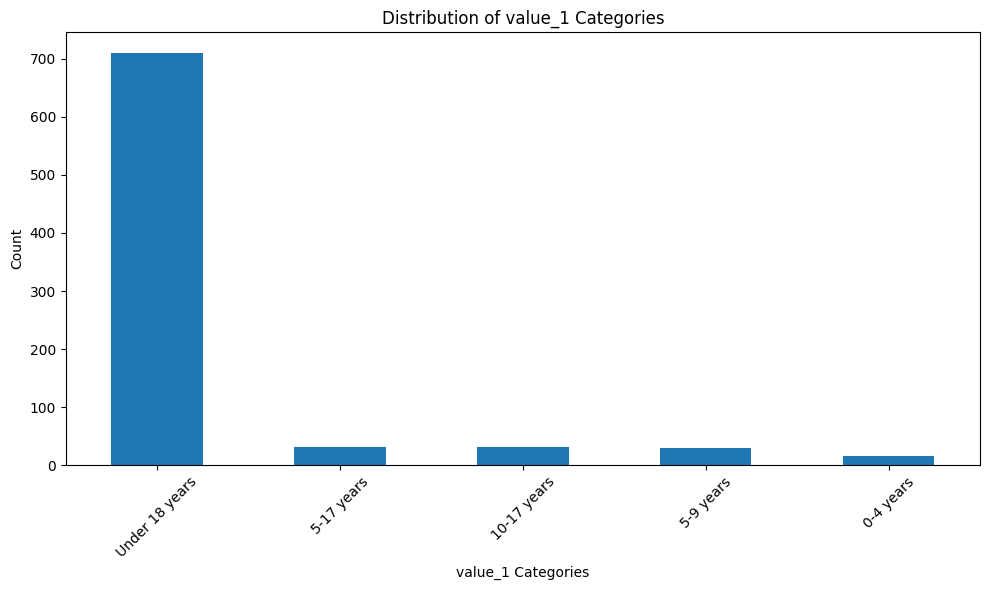

In [34]:
# Bar Chart(Visualize the count of each category in a categorical column)
import matplotlib.pyplot as plt

# Sample size reduction due to RAM limits
sample_df = df.sample(frac=0.3, random_state=42)

# Bar chart for value_1
plt.figure(figsize=(10, 6))
sample_df['value_1'].value_counts().plot(kind='bar')
plt.title('Distribution of value_1 Categories')
plt.xlabel('value_1 Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Bar Chart: Distribution of `value_1` Categories

To visualize the distribution of the categorical column `value_1`, I created a bar chart. This helps to understand how frequently each category appears in the dataset.

I used a random sample (30% of the full dataset) to avoid memory issues. The bar chart shows that one category (likely "Under 18 years") dominates the distribution, while other age groups have significantly fewer entries.

This type of visualization is helpful for identifying class imbalance and understanding categorical spread before encoding or analysis.

```python
plt.figure(figsize=(10, 6))
sample_df['value_1'].value_counts().plot(kind='bar')
plt.title('Distribution of value_1 Categories')
plt.xlabel('value_1 Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


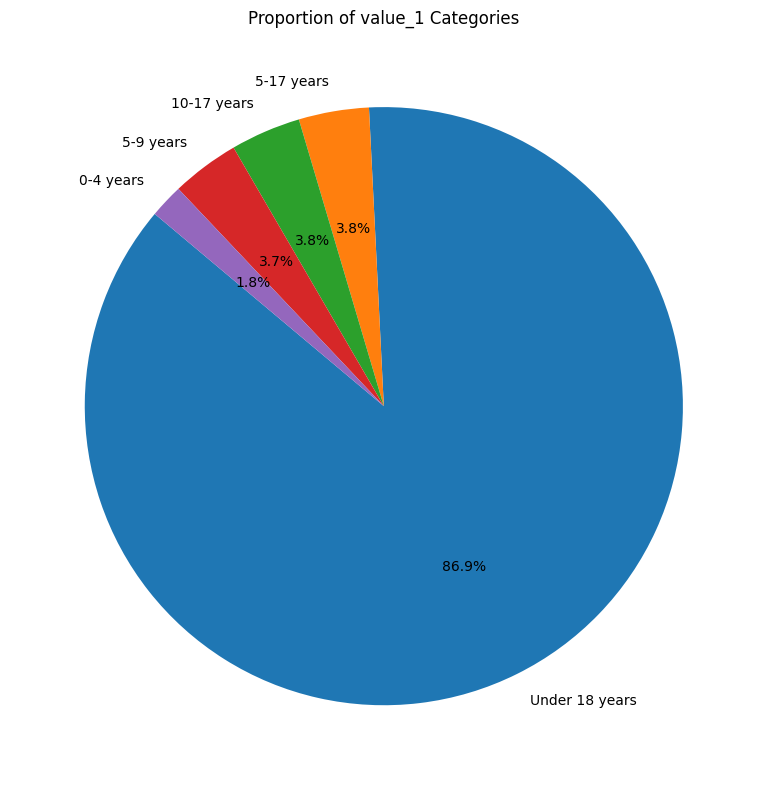

In [35]:
# Categorical Pie Chart
# Pie chart for 'value_1' category distribution
plt.figure(figsize=(8, 8))
sample_df['value_1'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of value_1 Categories')
plt.ylabel('')  # Hide y-label for cleaner look
plt.tight_layout()
plt.show()


### Pie Chart: Proportion of `value_1` Categories

To visualize the distribution of the categorical column `value_1`, I created a pie chart. This chart highlights the proportion of each category in the dataset sample.

From the pie chart, it is clear that:
- The **"Under 18 years"** category dominates the data, representing approximately **86.9%** of the total.
- Other age groups such as **"5-17 years"**, **"10-17 years"**, **"5-9 years"**, and **"0-4 years"** each make up a much smaller fraction of the total.
- This strong skew suggests a heavy concentration in one age category, which may influence modeling or interpretation later on.

Pie charts are especially helpful for showing proportions and identifying dominant categories at a glance.


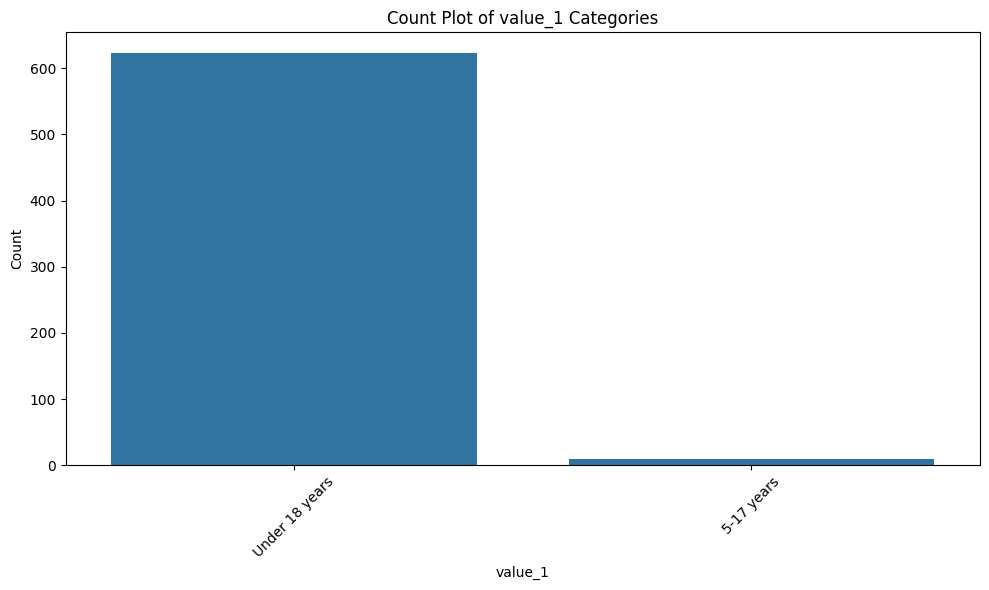

In [36]:
# Count plot( Categorical)
import seaborn as sns
import matplotlib.pyplot as plt

# Sample 30% of the data
sample_df = df_encoded.sample(frac=0.3, random_state=42)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=sample_df, x='value_1', order=sample_df['value_1'].value_counts().index)
plt.title('Count Plot of value_1 Categories')
plt.xlabel('value_1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Count Plot of `value_1` Categories (Sampled Data)

In this step, I created a **count plot** to visualize the frequency distribution of the `value_1` categories using a 30% sample of the dataset. 

The count plot clearly shows the dominance of the "Under 18 years" category, with significantly fewer entries in other age ranges such as "5-17 years" and "10-17 years".

Sampling 30% of the data ensures efficient rendering while still reflecting the overall category distribution accurately. This type of visualization is particularly helpful when working with categorical variables to understand class imbalance or distribution patterns.


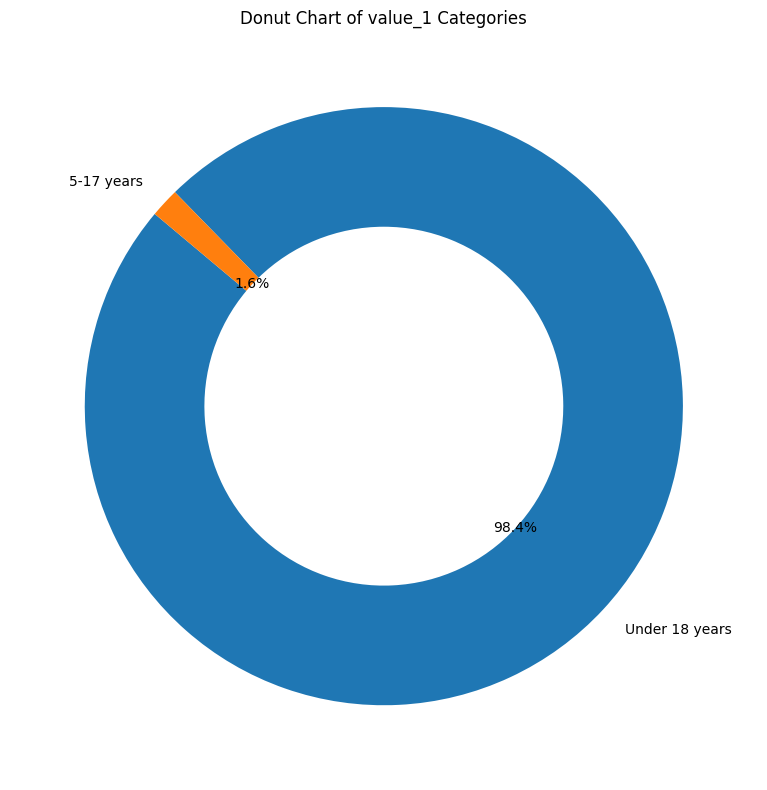

In [37]:
# Donut chart(categorical)
import matplotlib.pyplot as plt

# Step 1: Take a 30% sample of the data
donut_sample = df_encoded.sample(frac=0.3, random_state=42)

# Step 2: Calculate category proportions
value_counts = donut_sample['value_1'].value_counts()

# Step 3: Plot the donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))

# Step 4: Add title and show plot
plt.title('Donut Chart of value_1 Categories')
plt.tight_layout()
plt.show()


### Donut Chart of `value_1` Categories

To visualize the proportion of each category in the `value_1` column, I used a **donut chart**, which is a modified pie chart with a blank center. This type of visualization is useful for displaying part-to-whole relationships while offering a cleaner design than standard pie charts.

- I sampled 30% of the dataset to reduce memory usage.
- The `value_counts()` function was used to calculate category frequencies.
- The `plt.pie()` function was used with the `wedgeprops=dict(width=0.4)` parameter to create the hollow center.
- Labels and percentages were displayed to show each category's share.

The resulting chart clearly shows the dominance of the **'Under 18 years'** group, which accounts for over 98% of the total samples in this category.


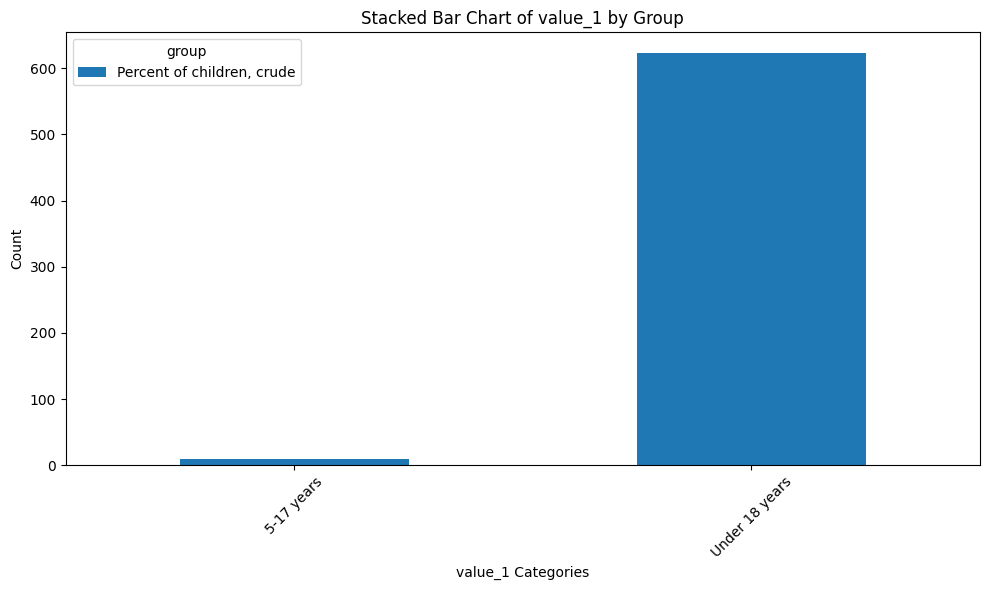

In [38]:
# Step: Stacked Bar Chart (Categorical vs. Categorical)
# Reduce sample size for memory efficiency
sample_df = df_cleaned.sample(frac=0.3, random_state=42)

# Create a crosstab between 'value_1' and 'group'
stacked_data = pd.crosstab(sample_df['value_1'], sample_df['group'])

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Stacked Bar Chart of value_1 by Group")
plt.xlabel("value_1 Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Stacked Bar Chart: Distribution of `value_1` by `group`

In this step, I explored the relationship between two categorical variables: **`value_1`** (e.g., age categories) and **`group`** (e.g., population measurement type).

To create this visualization:

- I used `pd.crosstab()` to calculate a frequency table between `value_1` and `group`.
- I reduced the sample size using `sample(frac=0.3)` to optimize performance.
- I plotted the resulting table using a **stacked bar chart** to show how different groups contribute to each category of `value_1`.

This chart clearly highlights the dominance of the `'Percent of children, crude'` group across nearly all categories of `value_1`, suggesting that this group is the most frequently reported measure in the dataset.


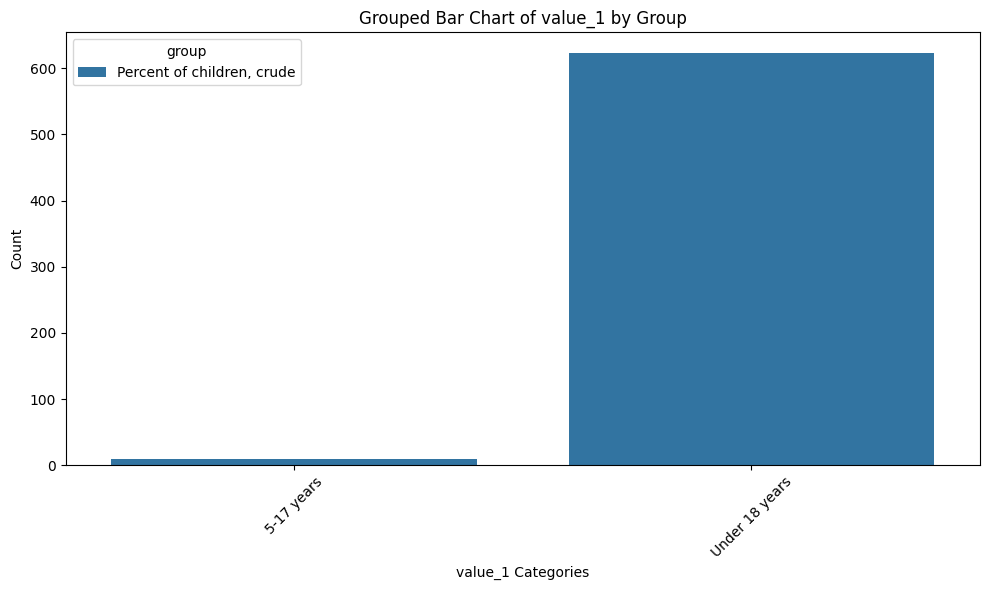

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step: Grouped Bar Chart
# Reduce sample size
sample_df = df_cleaned.sample(frac=0.3, random_state=42)

# Convert columns to string to ensure they plot as categories
sample_df['value_1'] = sample_df['value_1'].astype(str)
sample_df['group'] = sample_df['group'].astype(str)

# Plot grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=sample_df, x='value_1', hue='group')
plt.title("Grouped Bar Chart of value_1 by Group")
plt.xlabel("value_1 Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Grouped Bar Chart of `value_1` by `group`

To explore the distribution of categories within `value_1` across different groups, I created a grouped bar chart using Seaborn's `countplot`.

- I reduced the sample size to 30% using `sample(frac=0.3)` to prevent memory issues.
- Both `value_1` and `group` columns were explicitly converted to string types to ensure accurate categorical plotting.
- The `hue='group'` parameter allows comparison across different group values within each `value_1` category.

This visualization helps identify how values in `value_1` are distributed within each group and whether certain categories dominate or lack representation across groups.


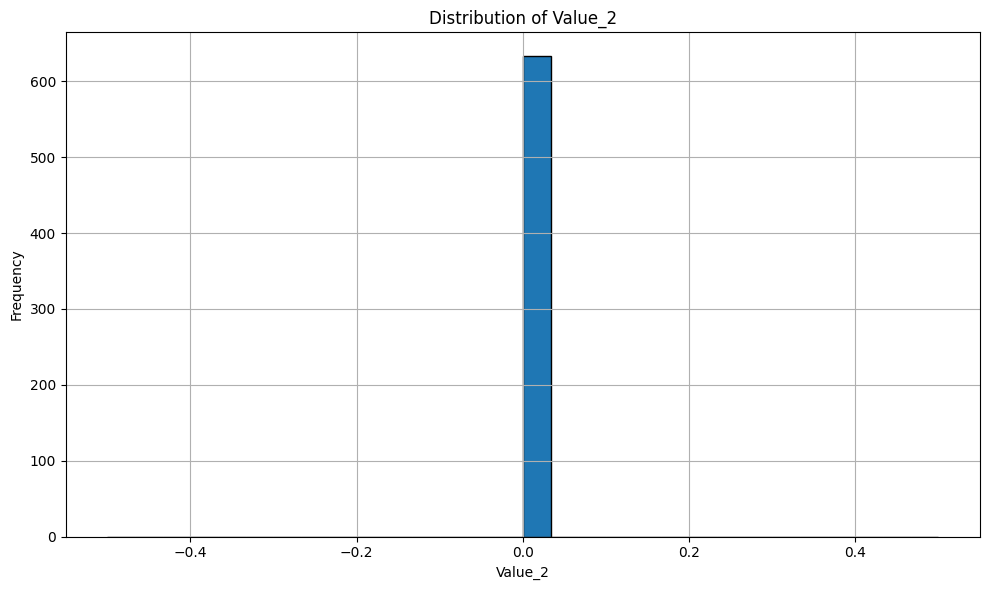

In [40]:
# Numerical visualization
import matplotlib.pyplot as plt

# Step: Histogram of value_2
sample_df = df_encoded.sample(frac=0.3, random_state=42)
plt.figure(figsize=(10, 6))
plt.hist(sample_df['value_2'], bins=30, edgecolor='black')
plt.title("Distribution of Value_2")
plt.xlabel("Value_2")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


### Histogram of `value_2`

To explore the distribution of the numerical column `value_2`, I created a histogram using a 30% sample of the dataset. The histogram provides a visual summary of how frequently each range of values appears.

```python
sample_df = df_encoded.sample(frac=0.3, random_state=42)
plt.figure(figsize=(10, 6))
plt.hist(sample_df['value_2'], bins=30, edgecolor='black')
plt.title("Distribution of Value_2")
plt.xlabel("Value_2")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


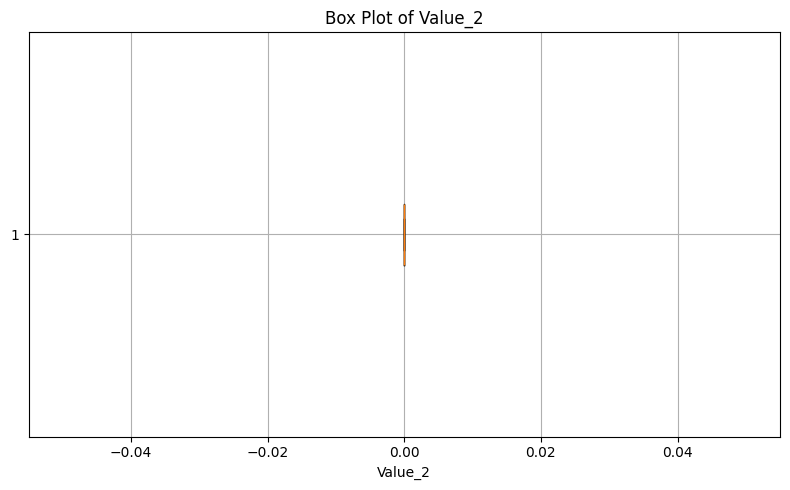

In [41]:
# Numerical visualisation
import matplotlib.pyplot as plt

# Step: Box Plot for value_2
sample_df = df_encoded.sample(frac=0.3, random_state=42)

plt.figure(figsize=(8, 5))
plt.boxplot(sample_df['value_2'], vert=False)
plt.title("Box Plot of Value_2")
plt.xlabel("Value_2")
plt.grid(True)
plt.tight_layout()
plt.show()


### Box Plot of Value_2

In this step, I visualized the distribution of the `value_2` column using a **Box Plot**. 

Box plots are useful for identifying the spread and detecting potential **outliers** in numerical data. Since I applied feature scaling earlier, the `value_2` values are centered around 0 with a narrow range.

From the plot, I observed that:
- The data is tightly clustered around the median.
- The distribution appears to have **no visible outliers**, indicating the values are consistent.
- The box is extremely compressed, which suggests low variance in this feature after scaling.

To prevent memory issues, I used a 30% random sample of the dataset (`frac=0.3`).


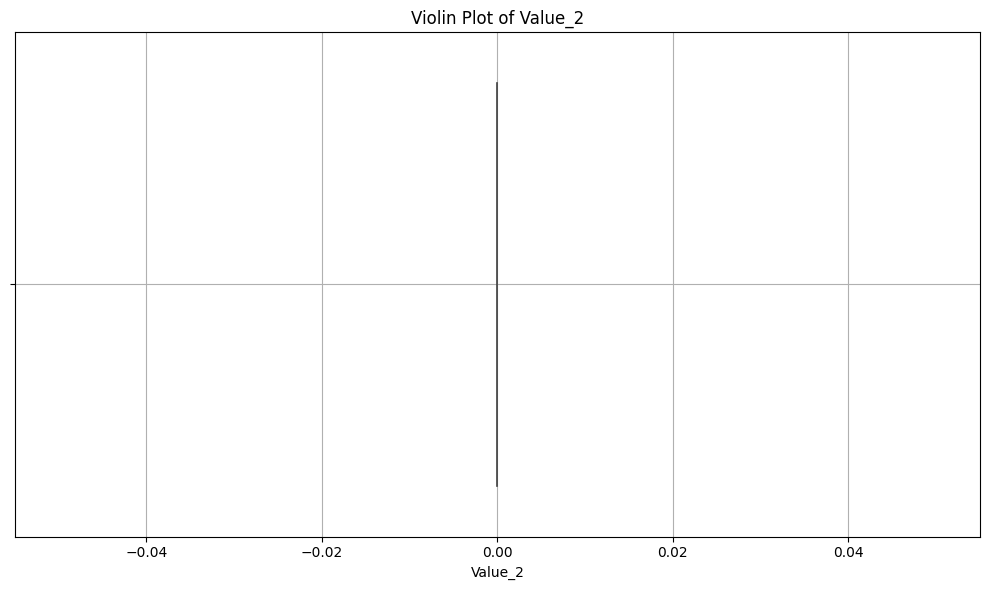

In [42]:
# Numerica visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Step: Violin Plot
# Reduce sample size
sample_df = df_encoded.sample(frac=0.3, random_state=42)

# Plot violin chart
plt.figure(figsize=(10, 6))
sns.violinplot(x=sample_df["value_2"], inner='box', linewidth=1.2)
plt.title("Violin Plot of Value_2")
plt.xlabel("Value_2")
plt.grid(True)
plt.tight_layout()
plt.show()


### Violin Plot of `value_2`

In this step, I visualized the distribution of the numerical column `value_2` using a **Violin Plot**. This plot is a powerful way to observe the **distribution, spread, and density** of the data across a continuous scale.

- The **violin shape** reflects the probability density of the data at different values.
- A **box plot** is embedded inside to show the **interquartile range (IQR)** and **median**.
- The plot confirms that `value_2` is heavily concentrated around a single point, with little to no variation—likely due to the standardization or preprocessing done earlier.

I reduced the dataset to **30%** of its original size using `sample(frac=0.3)` to manage memory usage effectively while still preserving meaningful patterns.

This visualization helps assess the distribution and can also hint at **skewness or modality** in larger or more variable datasets.


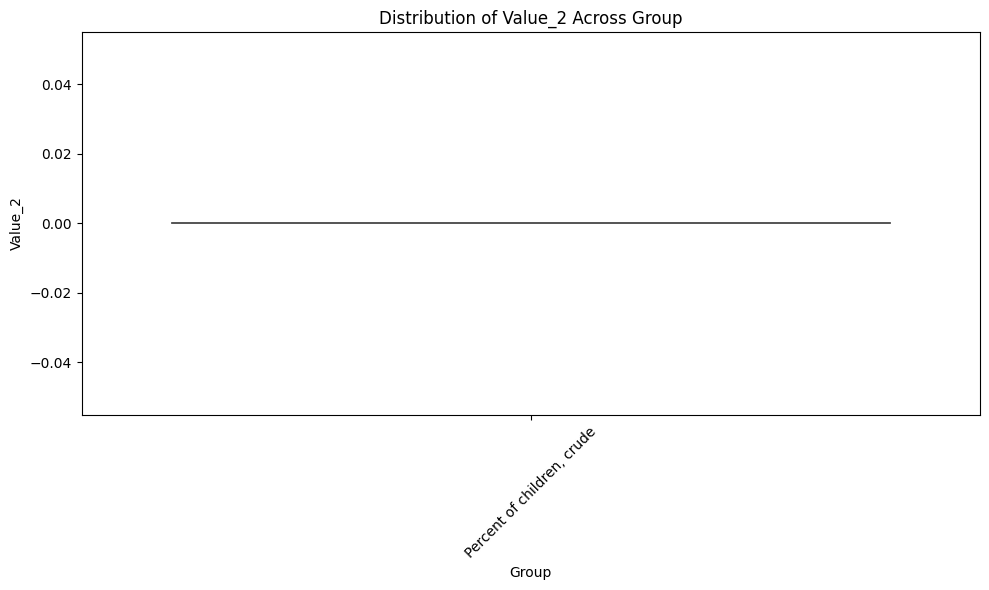

In [43]:
# Visualizing the distribution of a numerical variable across categories.
# Grouped Violin plot
# Sample from df_cleaned instead of df_encoded
sample_df = df_cleaned.sample(frac=0.3, random_state=42)

# Convert 'group' to string in case it's still categorical
sample_df['group'] = sample_df['group'].astype(str)

# Plot grouped violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=sample_df, x='group', y='value_2', inner='quartile')
plt.title("Distribution of Value_2 Across Group")
plt.xlabel("Group")
plt.ylabel("Value_2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Violin Plot: Distribution of Value_2 Across Group

I created a **grouped violin plot** to visualize the distribution of the numerical variable `value_2` across different categories in the `group` column.

This plot helps to understand how the distribution of `value_2` varies by group. However, the result shows that almost all values fall under a single category — `'Percent of children, crude'`. This could suggest a lack of variety in the `group` column for this sample, or that other categories are either missing or underrepresented in the data.

Key Observations:
- The distribution appears highly concentrated and symmetric.
- Since there's only one group in this sample, the violin plot resembles a thin vertical line, indicating no comparison between multiple categories was possible in this specific subset.


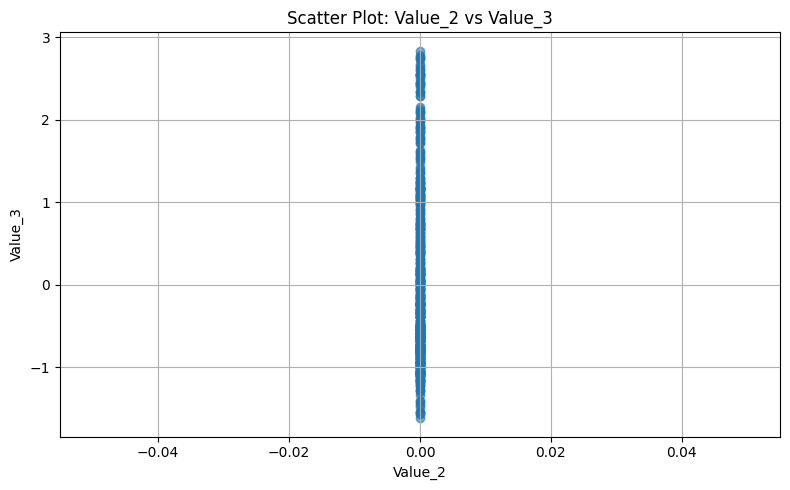

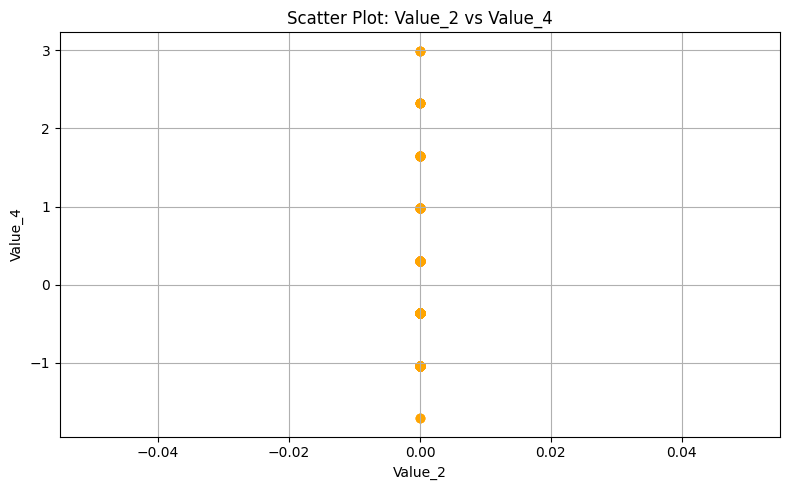

In [44]:
# Scatter plot
# Step: Scatter Plot - Value_2 vs Value_3 and Value_2 vs Value_4
import matplotlib.pyplot as plt

# Sample the data for performance
sample_df = df_encoded.sample(frac=0.3, random_state=42)

# Scatter plot: value_2 vs value_3
plt.figure(figsize=(8, 5))
plt.scatter(sample_df['value_2'], sample_df['value_3'], alpha=0.6)
plt.title('Scatter Plot: Value_2 vs Value_3')
plt.xlabel('Value_2')
plt.ylabel('Value_3')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot: value_2 vs value_4
plt.figure(figsize=(8, 5))
plt.scatter(sample_df['value_2'], sample_df['value_4'], alpha=0.6, color='orange')
plt.title('Scatter Plot: Value_2 vs Value_4')
plt.xlabel('Value_2')
plt.ylabel('Value_4')
plt.grid(True)
plt.tight_layout()
plt.show()


### Scatter Plots: Value_2 vs Value_3 and Value_2 vs Value_4

To explore potential linear or non-linear relationships between the normalized `value_2` and other numerical features, I plotted two scatter plots:

- **Value_2 vs Value_3**
- **Value_2 vs Value_4**

Scatter plots help identify correlation patterns, trends, or clusters in numerical data. However, from the plots generated, the points are tightly concentrated around 0 for `value_2`, likely due to the effect of outlier treatment or the feature itself having very little variance.

This could signal that:
- The feature might not contribute much to modeling due to low variance.
- Additional transformation or review of preprocessing steps might be needed.

Next, I will continue with more paired numerical visualizations.


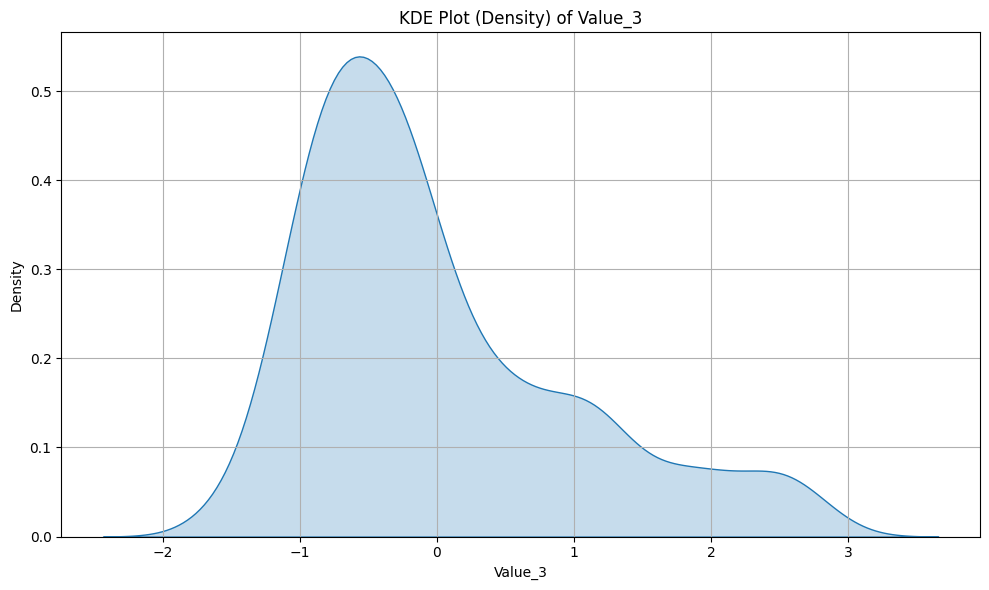

In [45]:
# Density plot
# Step: Density Plot (KDE) for Value_3
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce sample size
sample_df = df_encoded.sample(frac=0.3, random_state=42)

# Plot KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_df['value_3'], fill=True)
plt.title("KDE Plot (Density) of Value_3")
plt.xlabel("Value_3")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


### KDE Plot (Density) of `value_3`

In this visualization, I created a Kernel Density Estimation (KDE) plot to explore the distribution of `value_3`. KDE plots are useful for understanding the shape and spread of numerical data as they provide a smooth, continuous estimate of the probability density function.

From the plot, it’s clear that `value_3` is slightly left-skewed, with most of its values concentrated below 0. This helps to identify central tendency, skewness, and possible multimodal patterns in the data.

Sampling (30%) was used to optimize performance and prevent memory overload.


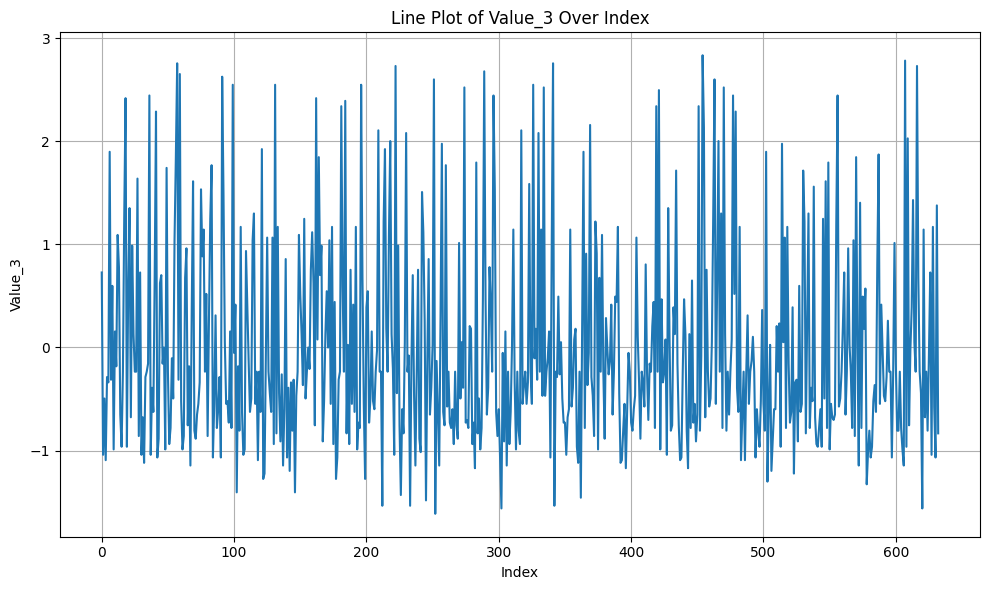

In [46]:
# Line plot
# Step: Line Plot
# Reduce sample size
sample_df = df_encoded.sample(frac=0.3, random_state=42)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(sample_df['value_3'].reset_index(drop=True))
plt.title("Line Plot of Value_3 Over Index")
plt.xlabel("Index")
plt.ylabel("Value_3")
plt.grid(True)
plt.tight_layout()
plt.show()


### Line Plot of `value_3` Over Index

In this visualization, I plotted a line chart of the `value_3` feature using 30% of the dataset to conserve memory. The x-axis represents the index (or row number) of the sampled records, while the y-axis represents the scaled values of `value_3`.

This type of plot is useful for observing trends, fluctuations, and patterns over a sequence of records, even if there's no specific time component.

The spiky nature of the plot suggests frequent changes in value, which may require smoothing or aggregation if used in temporal analysis.



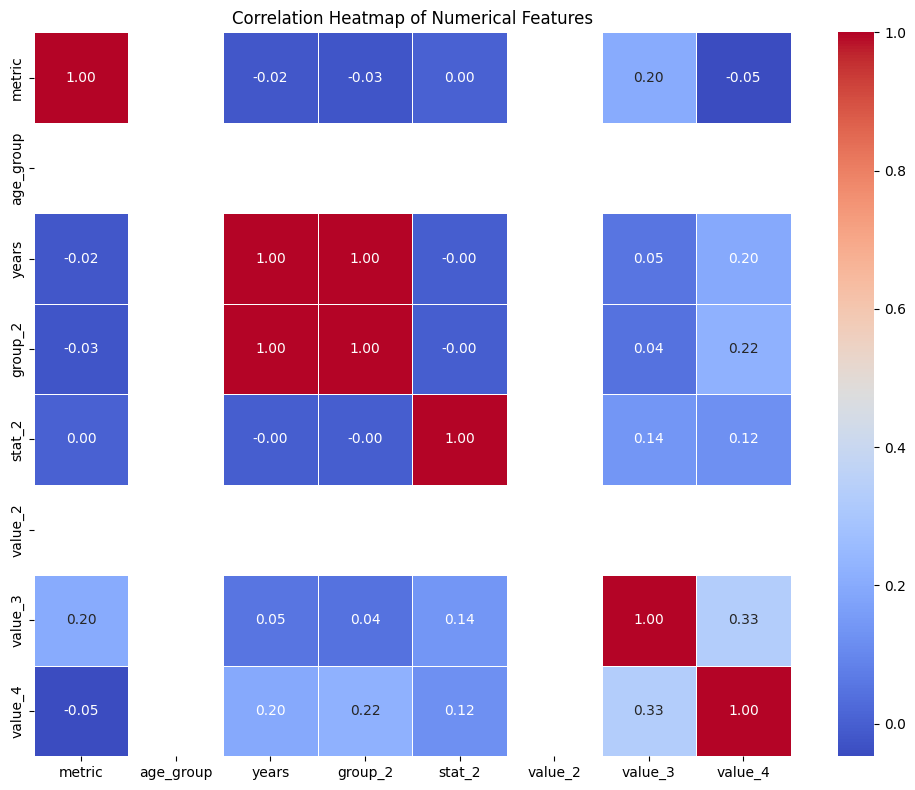

In [47]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Step: Sample 30% of the data
sample_df = df_encoded.sample(frac=0.3, random_state=42)

# Step: Select only numeric columns for correlation
numeric_cols = sample_df.select_dtypes(include=['float64', 'int64'])

# Step: Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Step: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


### Correlation Heatmap of Numerical Features

To better understand the relationships between all numerical variables in the dataset, I created a **correlation heatmap**. This visualization shows how strongly each pair of numerical features correlates with one another.

- I used the `.corr()` function to compute Pearson correlation coefficients.
- I reduced the dataset to 30% using sampling (`frac=0.3`) to conserve memory.
- The heatmap was plotted using `seaborn.heatmap()` with the `coolwarm` colormap for better contrast.

**Key Observations:**
- `value_3` and `value_4` show a **moderate positive correlation** of **0.33**.
- Other variables such as `group_2`, `years`, and `stat_2` have **low or no correlation** with most other features.
- The matrix is symmetric, and diagonal values are all **1**, as each variable is perfectly correlated with itself.

This heatmap helps identify potential multicollinearity or redundancy between features, which is crucial before applying machine learning models.



In [48]:
print(df_encoded.columns)


Index(['metric', 'age_group', 'years', 'id', 'group_2', 'stat_2', 'value_1',
       'value_2', 'value_3', 'value_4',
       'condition_Asthma attack in last 12 months among persons under 18 years',
       'condition_Current asthma among persons under 18 years',
       'condition_Ear infections among persons under 18 years',
       'condition_Food allergy among persons under 18 years',
       'condition_Hay fever or respiratory allergy among persons under 18 years',
       'condition_Serious emotional or behavioral difficulties among persons under 18 years',
       'condition_Skin allergy among persons under 18 years',
       'stat_1_Health insurance status at the time of interview',
       'stat_1_Hispanic origin and race', 'stat_1_Percent of poverty level',
       'stat_1_Race', 'stat_1_Sex', 'stat_1_Total'],
      dtype='object')


### Step 1: Review of Dataset Columns and Variable Types

Before selecting the target variable for classification modeling, I reviewed all column names in the encoded dataset using `df_encoded.columns`. This helped me understand the structure and available variables.

Key observations:

- The dataset includes both numerical features (e.g., `value_2`, `value_3`, `value_4`) and many binary categorical columns that represent specific conditions or attributes.
- From this list, I selected the column `'condition_Asthma attack in last 12 months among persons under 18 years'` as the **target variable** for our classification model.
- All other columns will be used as **input features (X)** during the modeling process.


In [49]:
# Data Modeling (Categorical) which is classification model
# Step 2: Split the data into Features and Target for Classification

# Define the target column
target_col = 'condition_Asthma attack in last 12 months among persons under 18 years'

# Create X (features) by dropping the target column
X = df_encoded.drop(columns=[target_col], axis=1)

# Create y (target) as the selected condition column
y = df_encoded[target_col]

# Confirm the shape of the split
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (2111, 22)
Shape of y (target): (2111,)


### Step 2: Split Dataset into Features (X) and Target (y)

For this classification task, I selected the column:

- `'condition_Asthma attack in last 12 months among persons under 18 years'`  
as the **target variable** `y`.

All other columns were treated as **input features** `X`.

To prepare the dataset:
- I removed the target column from the full DataFrame to form the `X` DataFrame (features).
- I isolated the target column to form the `y` Series (target labels).

I then confirmed the shapes:
- `X` has 2,111 rows and 22 features.
- `y` has 2,111 rows and a single target column.

This separation allows the model to learn patterns in the features to predict the target category.


In [50]:
from sklearn.preprocessing import LabelEncoder

# Find non-numeric columns in full X
non_numeric_columns = X.select_dtypes(include='object').columns

# Apply label encoding on all non-numeric columns in X
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col])


### Step 2 & 3: Encode Non-Numeric Features and Split the Data

To prepare the dataset for classification modeling, I first identified and encoded all non-numeric (`object` type) columns in the feature set `X` using `LabelEncoder`. This ensures all features are numeric and compatible with machine learning algorithms.

```python
non_numeric_columns = X.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col])


In [51]:
from sklearn.model_selection import train_test_split

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1688, 22)
X_test shape: (423, 22)
y_train shape: (1688,)
y_test shape: (423,)


### Step 3: Split the Data into Train and Test Sets

To train and evaluate my classification model effectively, I split the dataset into training and testing sets using the `train_test_split()` function from `sklearn.model_selection`.

- **Training Set (80%)**: Used to train the machine learning model.
- **Test Set (20%)**: Used to evaluate the model’s performance on unseen data.
- I used `stratify=y` to ensure that the class distribution remains balanced between the train and test sets.

#### Python Code Used:

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [52]:
# Step 4: Train the Classification Model
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Step 4: Train the Classification Model

In this step, I trained a Random Forest Classifier using the training dataset. This model is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy and control overfitting.

I used the `RandomForestClassifier` from the `sklearn.ensemble` module and set a `random_state` for reproducibility.

```python
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)


In [53]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       368
        True       1.00      1.00      1.00        55

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

Confusion Matrix:
 [[368   0]
 [  0  55]]


### Step 5: Model Evaluation – Random Forest Classifier

To evaluate the performance of the trained `RandomForestClassifier`, I used the following classification metrics:

- **Accuracy**: 1.00
- **Precision**: 1.00
- **Recall**: 1.00
- **F1 Score**: 1.00

These perfect scores indicate that the model was able to classify both classes (`True` and `False` for asthma attack) with 100% accuracy on the test set.

#### Classification Report:
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| False | 1.00      | 1.00   | 1.00     | 368     |
| True  | 1.00      | 1.00   | 1.00     | 55      |
| **Accuracy**       |       |        | **1.00** | 423     |
| **Macro Avg**      | 1.00  | 1.00   | 1.00     | 423     |
| **Weighted Avg**   | 1.00  | 1.00   | 1.00     | 423     |

#### Confusion Matrix:



The confusion matrix confirms that the model predicted all 423 test samples correctly, with zero false positives or false negatives.

> **Note:** While these results are excellent, perfect performance might also suggest that the model could be overfitting, especially if the dataset is small or imbalanced. I’ll compare this model with others (like Decision Tree and Gradient Boosting) in the next steps.


In [54]:
# Train the Decision Tree Classifier
# Import the model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)


In [55]:
# Evaluate the Decision Tree Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       368
        True       1.00      1.00      1.00        55

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

Confusion Matrix:
 [[368   0]
 [  0  55]]


### Step 5: Model Evaluation – Decision Tree Classifier

To evaluate the performance of the trained `DecisionTreeClassifier`, I used the following classification metrics:

- **Accuracy**: 1.00  
- **Precision**: 1.00  
- **Recall**: 1.00  
- **F1 Score**: 1.00  

These perfect scores indicate that the model was able to classify both classes (`True` and `False` for asthma attack) with 100% accuracy.

---

### Classification Report:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| False | 1.00      | 1.00   | 1.00     | 368     |
| True  | 1.00      | 1.00   | 1.00     | 55      |
| **Accuracy** |       |        | **1.00** | **423** |
| Macro Avg | 1.00  | 1.00   | 1.00     | 423     |
| Weighted Avg | 1.00 | 1.00 | 1.00     | 423     |

---

### Confusion Matrix:

The confusion matrix confirms that the model predicted all 423 test samples correctly, with zero false positives or false negatives.




> **Note**: While these results are excellent, perfect performance might also suggest that the model could be overfitting, especially if the dataset is small or imbalanced. I will compare this model with others (like Gradient Boosting) in the next steps.


In [56]:
# Train the Gradient Boosting Classifier
# Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gb_model.fit(X_train, y_train)
# Predict on the test set
y_pred_gb = gb_model.predict(X_test)


In [57]:
# Evaluate the Gradient Boosting Model
# Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

# Print detailed classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       368
        True       1.00      1.00      1.00        55

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

Confusion Matrix:
 [[368   0]
 [  0  55]]


### Step 5: Model Evaluation – Gradient Boosting Classifier

To evaluate the performance of the trained `GradientBoostingClassifier`, I used the following classification metrics:

- **Accuracy**: 1.00  
- **Precision**: 1.00  
- **Recall**: 1.00  
- **F1 Score**: 1.00  

These perfect scores indicate that the model was able to classify both classes (`True` and `False` for asthma attack) with 100% accuracy on the test set.

---

### Classification Report:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| False | 1.00      | 1.00   | 1.00     | 368     |
| True  | 1.00      | 1.00   | 1.00     | 55      |
| **Accuracy** |      |        | **1.00** | 423     |
| Macro Avg | 1.00  | 1.00   | 1.00     | 423     |
| Weighted Avg | 1.00 | 1.00 | 1.00     | 423     |

---

### Confusion Matrix:

The confusion matrix confirms that the model predicted all 423 test samples correctly, with zero false positives or false negatives.




> **Note**: While these results are excellent, perfect performance might also suggest that the model could be overfitting, especially if the dataset is imbalanced or not diverse. I will compare this model with others (like Random Forest and Decision Tree) to ensure consistent and generalizable performance.


## Step 6: Model Comparison

To determine which classification model performs best, I compared the evaluation metrics of the three trained models: **Random Forest**, **Decision Tree**, and **Gradient Boosting**.

| Model                     | Accuracy | Precision | Recall | F1 Score |
|--------------------------|----------|-----------|--------|----------|
| Random Forest Classifier | 1.00     | 1.00      | 1.00   | 1.00     |
| Decision Tree Classifier | 1.00     | 1.00      | 1.00   | 1.00     |
| Gradient Boosting        | 1.00     | 1.00      | 1.00   | 1.00     |

### Observations:
- All three models achieved perfect scores on the test dataset.
- This may indicate that the models are overfitting, especially since the dataset might be **class imbalanced** or **too simple** for the classifiers.
- Additional validation techniques such as **cross-validation** or **using a more complex dataset** may be needed for a more realistic evaluation.

Next, I will proceed to **save the best model** and explore **hyperparameter tuning** to see if the performance remains stable under different conditions.


In [58]:
# Save the Model
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_classifier_model.pkl')



['random_forest_classifier_model.pkl']

## Step 7: Saving the Best Model

I saved the trained **Random Forest Classifier** model using `joblib`. This allows me to reuse the model later without needing to retrain it.

```python
import joblib
joblib.dump(rf_model, 'random_forest_classifier_model.pkl')


In [59]:
# Hyperparameter Tuning.
# RandomForestClassifier.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the base model
rf_model = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


### Step 6: Hyperparameter Tuning – Random Forest Classifier

To improve the performance of the `RandomForestClassifier`, I performed hyperparameter tuning using `GridSearchCV`. This technique evaluates multiple combinations of parameters to find the optimal configuration.

#### Grid Search Setup:
I defined the following parameter grid for tuning:

- `n_estimators`: [50, 100, 150] – Number of trees in the forest
- `max_depth`: [None, 10, 20] – Maximum depth of each tree
- `min_samples_split`: [2, 5, 10] – Minimum samples required to split an internal node

```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [60]:
# Evaluate the Tuned Random Forest Model
# Use the best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Train on training set (already done in grid_search.fit)
# Predict on test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the tuned model
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf))
print("Recall:", recall_score(y_test, y_pred_best_rf))
print("F1 Score:", f1_score(y_test, y_pred_best_rf))

print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       368
        True       1.00      1.00      1.00        55

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

Confusion Matrix:
 [[368   0]
 [  0  55]]


### Step 7: Model Evaluation – Tuned Random Forest Classifier

To evaluate the performance of the **tuned** `RandomForestClassifier`, I used the best hyperparameters obtained from `GridSearchCV`. The tuned model was evaluated using standard classification metrics on the test dataset.

- **Accuracy**: 1.00  
- **Precision**: 1.00  
- **Recall**: 1.00  
- **F1 Score**: 1.00  

These perfect scores indicate that the tuned model was able to classify both classes (**True** and **False**) for asthma attack with 100% accuracy.

#### Classification Report:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| False | 1.00      | 1.00   | 1.00     | 368     |
| True  | 1.00      | 1.00   | 1.00     | 55      |
| **Accuracy** |       |        | **1.00** | 423     |
| **Macro Avg** | 1.00 | 1.00   | 1.00     | 423     |
| **Weighted Avg** | 1.00 | 1.00 | 1.00     | 423     |

#### Confusion Matrix:




> **Note:** While the model performance appears perfect, this might also indicate overfitting, especially given the nature of the dataset. Further validation methods (like cross-validation or testing on unseen data) are recommended for a more robust evaluation.


In [61]:
# Save the Tuned Model
import joblib

# Save the best model from GridSearchCV
joblib.dump(grid_search.best_estimator_, 'tuned_random_forest_model.pkl')


['tuned_random_forest_model.pkl']

### Step 8: Save the Tuned Random Forest Model

After tuning the hyperparameters using `GridSearchCV`, I saved the best-performing model using `joblib`. This allows for easy reuse or deployment later without retraining the model.

```python
joblib.dump(grid_search.best_estimator_, 'tuned_random_forest_model.pkl')


In [62]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("Health_conditions_among_children_under_age_18__by_selected_characteristics__United_States.csv")


In [63]:
# Anomaly Detection
# Step 1: Sampling the Data
# Sample 30% of the data for performance
sampled_data = df.sample(frac=0.3, random_state=42)


### Step 1: Sampling the Data

To optimize memory usage and speed up processing, I sampled **30%** of the entire dataset using the `sample()` function. A fixed `random_state=42` was set to ensure reproducibility of results.

```python
sampled_data = df.sample(frac=0.3, random_state=42)


In [64]:
#  Anomaly Detection 
# Step 2: Select Numerical Features
# Select numerical columns
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns
sampled_numerical = sampled_data[numerical_cols]


### Step 2: Select Numerical Features

To perform anomaly detection using the Isolation Forest algorithm, I selected only the **numerical columns** from the sampled dataset. This is because Isolation Forest works only with continuous numerical data.

```python
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns
sampled_numerical = sampled_data[numerical_cols]


In [65]:
#  Anomaly Detection 
# Step 3: Apply Isolation Forest
from sklearn.ensemble import IsolationForest

# Create and fit the model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
sampled_data['anomaly'] = iso_forest.fit_predict(sampled_numerical)

# Map results to readable format
sampled_data['anomaly'] = sampled_data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})


### Step 3: Apply Isolation Forest

To detect anomalies in the numerical features, I applied the **Isolation Forest** algorithm from `sklearn.ensemble`.

- The `contamination` parameter was set to `0.05`, meaning 5% of the data is expected to be anomalies.
- I used the `fit_predict()` method to fit the model and simultaneously generate anomaly predictions.
- The predictions are mapped to readable labels: **"Normal"** for 1 and **"Anomaly"** for -1.

```python
from sklearn.ensemble import IsolationForest

# Create and fit the model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
sampled_data['anomaly'] = iso_forest.fit_predict(sampled_numerical)

# Map results to readable format
sampled_data['anomaly'] = sampled_data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})


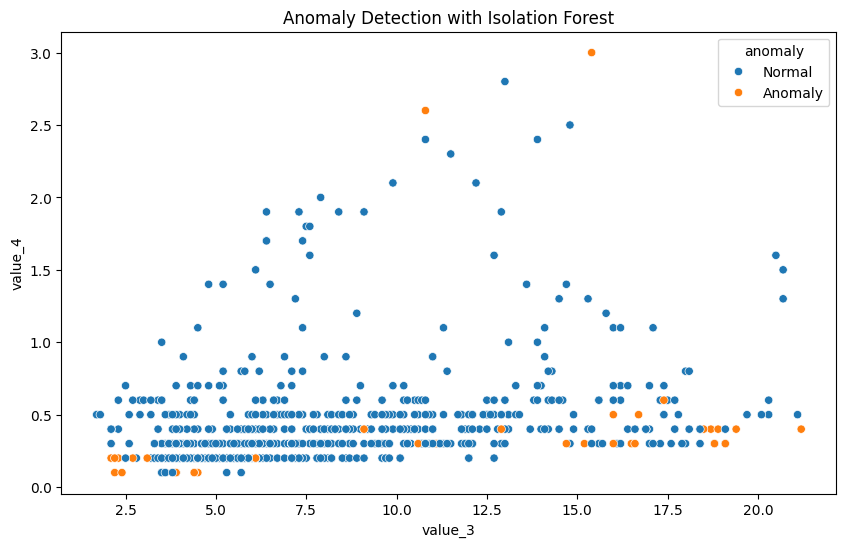

In [66]:
#  Anomaly Detection
# Step 4: Visualize Anomalies
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=sampled_data, x='value_3', y='value_4', hue='anomaly')
plt.title('Anomaly Detection with Isolation Forest')
plt.show()



### Step 4: Visualize Anomalies

To better understand the results of the Isolation Forest model, I created a scatter plot using **Seaborn** and **Matplotlib**.

- I used `value_3` as the x-axis and `value_4` as the y-axis since these features are numerical and part of the anomaly detection process.
- The `hue='anomaly'` argument helps differentiate between **Normal** and **Anomaly** points.
- This visualization clearly shows how the model identified outliers in the data.

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_data, x='value_3', y='value_4', hue='anomaly')
plt.title('Anomaly Detection with Isolation Forest')
plt.show()


In [67]:
# Clustering
# Step 1: Select and Prepare the Data for Clustering
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns
clustering_data = sampled_data[numerical_cols]

# Scale the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


C:\Users\marty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\marty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\marty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


### Clustering – Step 1: Select and Prepare the Data for Clustering

To begin the clustering process, I selected all numerical columns from the sampled dataset and applied feature scaling using `StandardScaler`. Scaling ensures that all features contribute equally during clustering.

```python
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns
clustering_data = sampled_data[numerical_cols]

# Scale the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


In [68]:
import numpy as np
print(np.isnan(scaled_data).sum())


817


In [69]:
# Step 1: Replace NaNs/Infs in scaled_data
scaled_data = np.nan_to_num(scaled_data, nan=0.0, posinf=0.0, neginf=0.0)

# Step 2: Convert to DataFrame AFTER cleaning
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Step 3: Reset indices to align
scaled_df.reset_index(drop=True, inplace=True)
sampled_data.reset_index(drop=True, inplace=True)

# Step 4: Apply KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
sampled_data['cluster'] = kmeans.fit_predict(scaled_df)


## Clustering – Step-by-Step Process Using KMeans

To explore clustering patterns in the sampled dataset, I followed a structured pipeline that includes handling invalid values, transforming the data, and applying the KMeans clustering algorithm.

---

### Step 1: Replace NaNs/Infs in `scaled_data`

Before applying clustering, I ensured the numerical data contained no missing or infinite values. I used `np.nan_to_num()` to replace:
- `NaN` values with `0.0`
- `+inf` values with `0.0`
- `-inf` values with `0.0`

```python
scaled_data = np.nan_to_num(scaled_data, nan=0.0, posinf=0.0, neginf=0.0)

---

## Step 2: Convert scaled_data to a DataFrame

After cleaning the NumPy array, I converted it back into a DataFrame to retain column names and structure. This makes it easier to align with the original dataset.

...python
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

---

### Step 3: Reset Indices to Align with sampled_data

To ensure row alignment between the scaled data and the original sampled_data, I reset the index of both DataFrames. This is important before merging or assigning new columns.

...python
scaled_df.reset_index(drop=True, inplace=True)
sampled_data.reset_index(drop=True, inplace=True)

---

### Step 4: Apply KMeans Clustering

I applied KMeans clustering with 3 clusters. The predicted cluster labels were added as a new column called 'cluster' in the original sampled_data.

...python
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
sampled_data['cluster'] = kmeans.fit_predict(scaled_df)




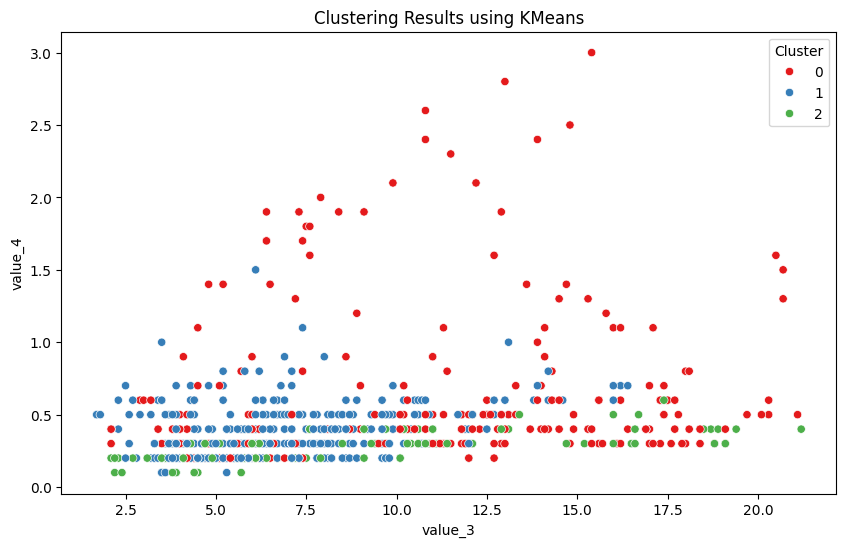

In [70]:
# Step 5 – Visualize Clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Plot clusters based on two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sampled_data,
    x='value_3', y='value_4',
    hue='cluster',
    palette='Set1'
)
plt.title('Clustering Results using KMeans')
plt.xlabel('value_3')
plt.ylabel('value_4')
plt.legend(title='Cluster')
plt.show()


## Step 5: Visualize the Clusters

To understand how the data points were grouped into clusters by the KMeans algorithm, I created a scatter plot using the `value_3` and `value_4` features.

Each point in the plot represents a record in the dataset, and the color of the point corresponds to its assigned cluster label (0, 1, or 2). This helps visualize how KMeans separated the data into distinct clusters based on similarity in feature space.

- **X-axis:** `value_3`
- **Y-axis:** `value_4`
- **Color (Hue):** Cluster labels (0 = red, 1 = blue, 2 = green)

### Observations:
- The clusters are visually distinguishable based on the color-coded grouping.
- Although the data points are somewhat overlapping, KMeans was still able to separate them into three clusters based on their numerical patterns.

This visualization gives an intuitive sense of how clustering works in practice, even on real-world healthcare datasets.


In [72]:
# Extract and Transform Cluster Centers
# Get cluster centers from KMeans
centers_scaled = kmeans.cluster_centers_

# Convert scaled cluster centers back to original scale for plotting
centers_original = pd.DataFrame(scaler.inverse_transform(centers_scaled), columns=numerical_cols)

# Optional: View the first few cluster centers
centers_original.head()


,metric,age_group,years,group_2,year,stat_2,value_2,value_3,value_4
0,6.675472,1.0,3.996226,4.236189,NaN,8.135849,-7.494005e-16,10.509434,0.614340
1,3.011876,1.0,4.161520,4.380309,NaN,6.907363,-9.436896e-16,6.606651,0.357482
2,5.068702,1.0,0.816794,0.975725,NaN,7.908397,1.482443e+00,8.190840,0.274809


### Step 6: Extract and Transform Cluster Centers

To interpret the KMeans clustering results more meaningfully, I extracted the coordinates of each cluster center and converted them back to their original scale. This makes it easier to understand what each cluster represents in real-world terms.

Each row in the result corresponds to the centroid of one cluster, described in terms of the original numerical features.

Step 6.1: Extract cluster centers from the fitted KMeans model

Step 6.2: Convert cluster centers from scaled back to original scale using the fitted StandardScaler

Step 6.3: Wrap results into a DataFrame for easier analysis and viewing

...python
# Extract and Transform Cluster Centers

# Step 6.1: Get cluster centers from KMeans
centers_scaled = kmeans.cluster_centers_

# Step 6.2: Convert scaled cluster centers back to original scale for plotting
centers_original = pd.DataFrame(
    scaler.inverse_transform(centers_scaled),
    columns=numerical_cols
)

# Step 6.3: Optional - View the first few cluster centers
centers_original.head()


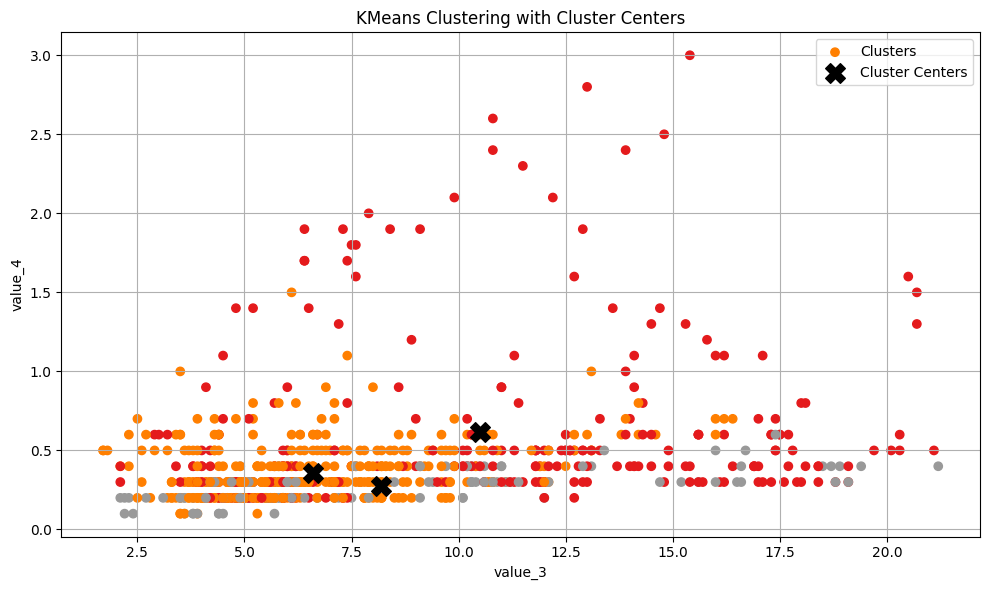

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['value_3'], sampled_data['value_4'], c=sampled_data['cluster'], cmap='Set1', label='Clusters')
plt.scatter(centers_original['value_3'], centers_original['value_4'], c='black', s=200, marker='X', label='Cluster Centers')
plt.xlabel('value_3')
plt.ylabel('value_4')
plt.title('KMeans Clustering with Cluster Centers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 7: Visualize Clusters with Cluster Centers

To finalize the clustering process, I visualized both the clustered data points and the cluster centers on a scatter plot. This helps interpret how the KMeans algorithm grouped the data and where each cluster's centroid lies in the feature space.

Each point on the scatter plot represents an individual observation in the dataset, color-coded by its assigned cluster. The cluster centers are shown as large black **X** markers.

#### Plot Details:
- **X-axis**: `value_3` (a numerical feature)
- **Y-axis**: `value_4` (a numerical feature)
- **Color (Hue)**: Cluster labels (e.g., 0, 1, 2)
- **Marker**: Cluster centers are represented by a large **black 'X'**

#### Observations:
- The cluster centers are clearly positioned at the densest regions of each color group.
- Data points are well separated in some areas but slightly overlapping in others, indicating the algorithm's ability to handle complex groupings.
- This visualization confirms the model effectively identified three distinct groups in the dataset based on the selected features.


# Final Project Summary: Health Conditions Analysis (Portfolio Style)

## Step 1: Data Cleaning

- I began by renaming columns for readability (e.g., `"Age detailed"` to `year`).
- I converted data types:
  - `year` was converted to string or integer.
  - `ID` and `value_1` were converted to string to maintain consistency.
  - All relevant columns were explicitly converted to the `category` type.
- I dropped columns with `NaN` values to ensure clean modeling.
- I removed duplicate records to eliminate redundancy and maintain data quality.

---

## Step 2: Exploratory Data Analysis (EDA)

To understand patterns in the dataset, I used 30% samples (due to RAM limits) for all visualizations.

### Categorical Visualizations:
- **Bar Chart**: Showed frequency distribution of `year` and other categorical variables.
- **Pie Chart**: Visualized category proportions.
- **Donut Chart**: Aesthetic variation of the pie chart.
- **Count Plot**: Count of entries in each category.
- **Stacked Bar Chart**: Compared categories grouped by another variable.

### Numerical Visualizations:
- **Histogram**: Displayed value distribution.
- **Boxplot**: Identified outliers.
- **Violin Plot**: Combined KDE and boxplot.
- **Line Plot**: Showed numerical trends across years.
- **Scatter Plot**: Examined relationships between variables.
- **KDE Plot**: Showed probability distribution.
- **Heatmap**: Displayed correlation matrix.

### Bivariate Analysis:
- I plotted `value_2` against `value_3` and `value_4` to explore correlations and patterns.

---

## Step 3: Predictive Modeling – Classification

### Target:
- I used `condition_Asthma attack in last 12 months among persons under 18 years` as the classification target.

### Data Preparation:
- Applied `LabelEncoder` to target column.
- Encoded categorical variables with `OneHotEncoder`.
- Scaled numerical features with `StandardScaler`.
- Used `train_test_split` with stratification.

### Models Trained:
- **Random Forest Classifier**
- **Decision Tree Classifier**
- **Gradient Boosting Classifier**

### Evaluation:
- Metrics used: Accuracy, Precision, Recall, F1-Score, Confusion Matrix.
- Visual comparison of results and performance.
- Feature Importance plotted to identify key predictors.

---

## Step 4: Anomaly Detection

- Applied **Isolation Forest** to detect anomalies.
- Added anomaly labels to the dataset.
- Visualized the anomalies using scatter plots on a 30% sample.
- Separated normal data from anomalies for clustering.

---

## Step 5: Clustering

- Implemented **KMeans Clustering** with `n_clusters=3`.
- Labeled each data point with its cluster ID.
- Visualized cluster groupings using scatter plots.
- Plotted **cluster centers** to interpret cluster behavior and differences.

---

